# Assignment Details:

In chapter 1 of this course you learned to explore voting data and predict party classification:

https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification?ex=5 (Links to an external site.)

For this assignment you should create a Jupyter notebook that implements the full supervised learning flow from that exercise.

Your notebook should have distinct sections for these operations:

- data acquisition (using this data file  Download data file)
- Numerical EDA 
- Visual EDA  
- Fit a k-Nearest neighbors classifier
- Predict k-Nearest neighbors with training data set
- Check model accuracy with test data set

Upload your finished notebook to your github.com repository and submit a link to it here in Canvas.

Note - you can test your model against a new, unlabeled data point (as in the Datacamp exercise) using this data:

X_new = pd.DataFrame.from_dict({"0":{"0":0.6964691856},"1":{"0":0.286139335},"2":{"0":0.2268514536},"3":{"0":0.5513147691},"4":{"0":0.7194689698},"5":{"0":0.4231064601},"6":{"0":0.9807641984},"7":{"0":0.6848297386},"8":{"0":0.4809319015},"9":{"0":0.3921175182},"10":{"0":0.3431780162},"11":{"0":0.7290497074},"12":{"0":0.4385722447},"13":{"0":0.0596778966},"14":{"0":0.3980442553},"15":{"0":0.7379954057}})

# 1. Data acquisition (using this [votes.json data file](https://drive.google.com/file/d/1HRum4XjwNasyefEe6NVhQ5eObqAPTUpQ/view?usp=sharing))

**Import pandas and read the json file**

In [8]:
# Import pandas and json
import pandas as pd
import json

#Read the dict file into df
votesDF = pd.read_json('/votes.json')

# Print df to check values
print(votesDF)

          party  infants  water  ...  crime  duty_free_exports  eaa_rsa
0    republican        0      1  ...      1                  0        1
1    republican        0      1  ...      1                  0        1
2      democrat        0      1  ...      1                  0        0
3      democrat        0      1  ...      0                  0        1
4      democrat        1      1  ...      1                  1        1
..          ...      ...    ...  ...    ...                ...      ...
430  republican        0      0  ...      1                  0        1
431    democrat        0      0  ...      0                  0        1
432  republican        0      1  ...      1                  0        1
433  republican        0      0  ...      1                  0        1
434  republican        0      1  ...      1                  0        0

[435 rows x 17 columns]


# 2. Numerical EDA 

**- DF Info**

In [9]:
votesDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    int64 
 2   water              435 non-null    int64 
 3   budget             435 non-null    int64 
 4   physician          435 non-null    int64 
 5   salvador           435 non-null    int64 
 6   religious          435 non-null    int64 
 7   satellite          435 non-null    int64 
 8   aid                435 non-null    int64 
 9   missile            435 non-null    int64 
 10  immigration        435 non-null    int64 
 11  synfuels           435 non-null    int64 
 12  education          435 non-null    int64 
 13  superfund          435 non-null    int64 
 14  crime              435 non-null    int64 
 15  duty_free_exports  435 non-null    int64 
 16  eaa_rsa            435 non-null    int64 
dt

**- DF display all data**

In [10]:
display(votesDF)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,democrat,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,republican,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,republican,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,1


**- Show first head rows**

In [11]:
votesDF.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


**- DF statistics summary**

In [12]:
votesDF.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Visual EDA  

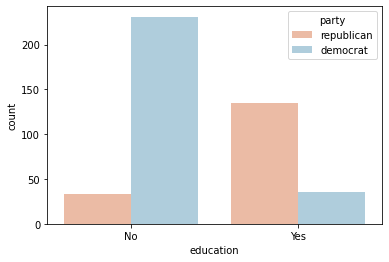

In [13]:
# Import pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='education', hue='party', data=votesDF, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# 4. Fit a k-Nearest neighbors classifier

In [14]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = votesDF['party'].values
X = votesDF.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

# 5. Predict k-Nearest neighbors with training data set

In [15]:
# Import necessary modules
from sklearn.model_selection import train_test_split

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# redict and print the labels for the training data X: y_pred
y_pred = knn.predict(X_train)
print("Prediction: {}".format(y_pred))

Prediction: ['democrat' 'democrat' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'republican' 'republican' 'democrat' 'democrat' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'republican' 'democrat'
 'democrat' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'republican' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'republican' 'democrat' 'republican' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'democrat' 'republican' 'republican'
 'republican' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'republican' 'democrat' 'republican' 'democrat'
 'republican' 'republican' 'republican' 'republican' 'republican'
 'republican' 'democrat' 'republican' 'democrat' 'democrat' 'repub

# 6. Check model accuracy with test data set

In [16]:
# Print the accuracy
print("test accuracy= ", knn.score(X_test, y_test))

test accuracy=  0.9425287356321839


In [17]:
# new unlabled x to test the model
X_new = pd.DataFrame.from_dict({"0":{"0":0.6964691856},"1":{"0":0.286139335},"2":{"0":0.2268514536},"3":{"0":0.5513147691},"4":{"0":0.7194689698},"5":{"0":0.4231064601},"6":{"0":0.9807641984},"7":{"0":0.6848297386},"8":{"0":0.4809319015},"9":{"0":0.3921175182},"10":{"0":0.3431780162},"11":{"0":0.7290497074},"12":{"0":0.4385722447},"13":{"0":0.0596778966},"14":{"0":0.3980442553},"15":{"0":0.7379954057}})


# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))


Prediction: ['democrat']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
